https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

%load_ext autoreload
%autoreload 2

ROOT_DIR = '../..'
DATA_DIR = os.path.join(ROOT_DIR, 'data')
DATA_RAW = os.path.join(DATA_DIR, 'raw')
DATA_INTERIM = os.path.join(DATA_DIR, 'interim')
DATA_EXTERNAL = os.path.join(DATA_DIR, 'external')

SRC_DIR = os.path.join(ROOT_DIR, 'src')

SEATTLE_MAP = os.path.join(DATA_EXTERNAL, 'Neighborhoods', 'StatePlane',
                           'Neighborhoods.shp')
SEATTLE_MAP = os.path.join(DATA_EXTERNAL, 'neighborhoods.geojson')
SEATTLE_LIMITS = os.path.join(DATA_EXTERNAL, 'city-limits.geojson')

LONDON_MAP = os.path.join(DATA_EXTERNAL, 'statistical-gis-boundaries-london',
                          'ESRI','London_Borough_Excluding_MHW.shp')
LONDON_DATA = os.path.join(DATA_EXTERNAL, 'london-borough-profiles.csv')

SEATTLE_LISTINGS = os.path.join(DATA_RAW, 'seattle', 'listings.csv')

import sys
sys.path.append(SRC_DIR)
sys.path.append(os.path.join(SRC_DIR, 'data'))

import preprocessing as pp
import missing_data as md
import make_dataset

In [2]:
import geopandas as gpd

In [3]:
map_df = gpd.read_file(LONDON_MAP)

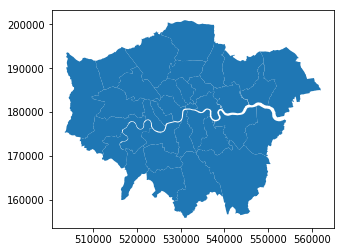

In [4]:
map_df.plot()

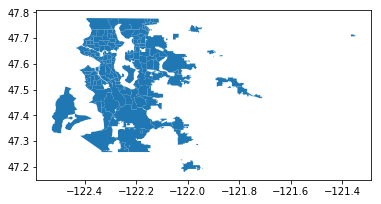

In [5]:
seattle = gpd.read_file(SEATTLE_MAP)
seattle.plot()

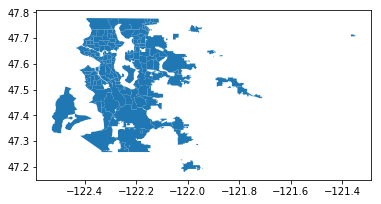

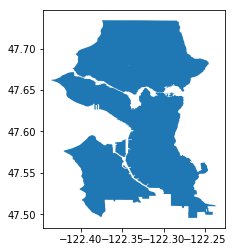

In [6]:
seattle = gpd.read_file(SEATTLE_MAP)
seattle_l = gpd.read_file(SEATTLE_LIMITS)
ax = seattle.plot()
seattle_l.plot()

In [7]:
seattle.nhood.value_counts().shape[0]

84

In [8]:
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [9]:
df = pd.read_csv(LONDON_DATA, header=0)
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,0,0.0,0.0,0.0,0.0
1,E09000002,Barking and Dagenham,Outer London,209000,78188,3611,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423,8675,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,0.0,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,6058,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048,4323,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [10]:
df = df[['Area_name',
         'Average_Age,_2017']]

In [11]:
df = df.rename(columns={'Area_name': 'borough',
                   'Average_Age,_2017': 'age'})
df.head()

,borough,age
0,City of London,43.2
1,Barking and Dagenham,32.9
2,Barnet,37.3
3,Bexley,39.0
4,Brent,35.6


In [12]:
merged = map_df.set_index('NAME').join(df.set_index('borough'))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,age
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",37.1
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",37.0
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",40.2
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",35.8
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",36.2


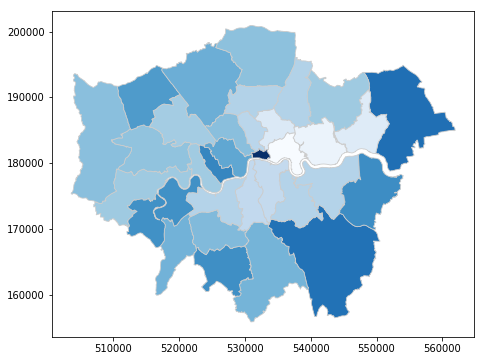

In [13]:
variable = 'age'
vmin, vmax = df.age.min(), df.age.max()
fig, ax = plt.subplots(1, figsize=(10,6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

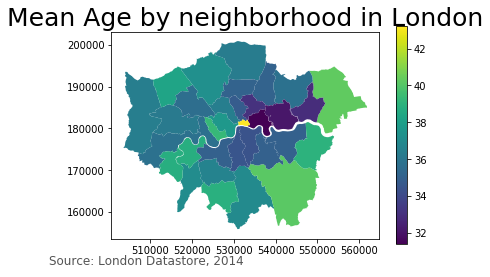

In [14]:
merged.plot(column=variable)
plt.title('Mean Age by neighborhood in London', fontdict={'fontsize': '25',
                                                          'fontweight' : '3'})
plt.annotate('Source: London Datastore, 2014',
             xy=(0.1, .08),
             xycoords='figure fraction', 
             horizontalalignment='left', 
             verticalalignment='top', 
             fontsize=12, 
             color='#555555')

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm)

### Seattle

In [15]:
# If the dataset is already processed comment the line below
# make_dataset.create_dataset()
calendar, listings, reviews = make_dataset.load_processed()

In [16]:
l_prices = listings[['neighbourhood', 'price']]
l_prices.head()

,neighbourhood,price
0,Queen Anne,85.0
1,Queen Anne,150.0
2,Queen Anne,975.0
3,Queen Anne,100.0
4,Queen Anne,450.0


In [17]:
seattle = gpd.read_file(SEATTLE_MAP)

In [18]:
seattle.head()

,id,city,county,nhood,nested,area,name,geometry
0,Seattle:Ballard:Loyal Heights,Seattle,King,Ballard,Loyal Heights,2.132066e+07,Loyal Heights,POLYGON ((-122.3763324293266 47.67593689108358...
1,Seattle:Ballard:Adams,Seattle,King,Ballard,Adams,2.243128e+07,Adams,POLYGON ((-122.3763324293266 47.67593689108358...
2,Seattle:Ballard:Whittier Heights,Seattle,King,Ballard,Whittier Heights,1.419569e+07,Whittier Heights,POLYGON ((-122.3763324293266 47.67593689108358...
3,Seattle:Ballard:West Woodland,Seattle,King,Ballard,West Woodland,2.219937e+07,West Woodland,POLYGON ((-122.3763324293266 47.67593689108358...
4,Seattle:Ballard:Sunset Hill,Seattle,King,Ballard,Sunset Hill,2.433562e+07,Sunset Hill,"POLYGON ((-122.40210822192 47.69766032373056, ..."


In [19]:
merged = seattle.set_index('nhood').join(l_prices.set_index('neighbourhood'))
merged.head()

,id,city,county,nested,area,name,geometry,price
Ballard,Seattle:Ballard:Loyal Heights,Seattle,King,Loyal Heights,2.132066e+07,Loyal Heights,POLYGON ((-122.3763324293266 47.67593689108358...,85.0
Ballard,Seattle:Ballard:Loyal Heights,Seattle,King,Loyal Heights,2.132066e+07,Loyal Heights,POLYGON ((-122.3763324293266 47.67593689108358...,465.0
Ballard,Seattle:Ballard:Loyal Heights,Seattle,King,Loyal Heights,2.132066e+07,Loyal Heights,POLYGON ((-122.3763324293266 47.67593689108358...,175.0
Ballard,Seattle:Ballard:Loyal Heights,Seattle,King,Loyal Heights,2.132066e+07,Loyal Heights,POLYGON ((-122.3763324293266 47.67593689108358...,60.0
Ballard,Seattle:Ballard:Loyal Heights,Seattle,King,Loyal Heights,2.132066e+07,Loyal Heights,POLYGON ((-122.3763324293266 47.67593689108358...,59.0


In [20]:
merged.shape

(4796, 8)

In [21]:
vmin, vmax = 60, 200

In [22]:
vmax

200

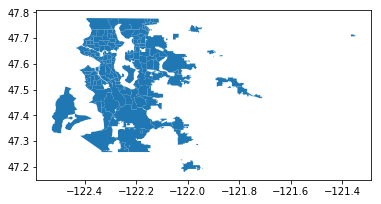

In [23]:
seattle.plot()

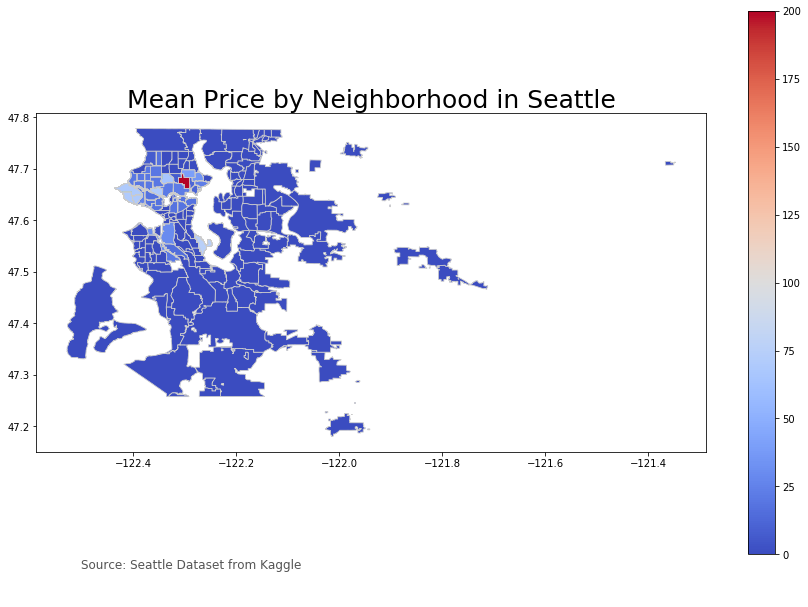

In [26]:
vmin, vmax = 0, 200
cmap = 'coolwarm'
variable = 'price'

fig, ax = plt.subplots(1, figsize=(15,10))
_ = merged.fillna(0).plot(column=variable,
                          cmap=cmap,
                          linewidth=0.8, 
                          edgecolor='0.8',
                          ax=ax)

plt.title('Mean Price by Neighborhood in Seattle', fontdict={'fontsize': '25',
                                                          'fontweight' : '3'})
plt.annotate('Source: Seattle Dataset from Kaggle',
             xy=(0.1, .08),
             xycoords='figure fraction', 
             horizontalalignment='left', 
             verticalalignment='top', 
             fontsize=12, 
             color='#555555')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm)

In [27]:
merged.reset_index().groupby('index').price.mean().sort_values(ascending=False)[:30]

index
Industrial District    190.000000
Magnolia               176.000000
Windermere             174.700000
Queen Anne             168.764706
Green Lake             147.473684
View Ridge             143.833333
Phinney Ridge          133.897059
Fremont                131.018634
Wallingford            128.304878
Capitol Hill           126.433048
Ballard                123.615023
Wedgwood               116.000000
Interbay               115.444444
Bryant                 110.272727
Laurelhurst            108.400000
Ravenna                105.412698
Roosevelt              104.500000
Broadview              102.875000
Greenwood               99.098901
Seward Park             98.562500
University District     91.114754
South Park              90.000000
Bitter Lake             76.428571
Crown Hill              76.363636
Georgetown              76.125000
Beacon Hill                   NaN
Benson                        NaN
Bridle Trails                 NaN
Cascade                       NaN
Cedar Ri

In [28]:
listings.neighbourhood.value_counts().head()

Capitol Hill    351
Belltown        221
Ballard         213
Minor           207
Queen Anne      187
Name: neighbourhood, dtype: int64

In [29]:
(listings.neighbourhood.value_counts() > 20).sum()

38